<a href="https://colab.research.google.com/github/ClaudixoPG/ESI_2025_S1/blob/main/notebooks/Visualizaciones_GUESS_Minecraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de resultados GUESS - Minecraft (Comparación Realista)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi
sns.set(style='whitegrid')

In [5]:
# Cargar datos desde GitHub
url = "https://raw.githubusercontent.com/ClaudixoPG/ESI_2025_S1/main/datasets/Minecraft_Evaluacion_GUESS.xlsx"
df = pd.read_excel(url)
df.head()

,version,usuario,Audio Aesthetics,Creative Freedom,Enjoyment,Narratives,Personal Gratification,Play Engrossment,Social Connectivity,Usability/Playability,Visual Aesthetics
0,Minecraft Beta,1,3.13,3.82,5.08,3.58,4.41,3.21,4.31,4.06,4.13
1,Minecraft Beta,2,3.63,3.79,5.06,4.42,3.85,3.62,4.78,4.33,3.89
2,Minecraft Beta,3,3.03,3.89,3.96,3.13,3.60,3.49,4.19,3.79,4.72
3,Minecraft Beta,4,2.80,4.39,4.41,3.48,4.27,3.35,4.35,3.77,4.30
4,Minecraft Beta,5,3.32,4.98,4.24,3.29,3.75,3.58,3.95,4.18,4.67


In [6]:
mean_scores = df.drop(columns='usuario').groupby('version').mean(numeric_only=True).reset_index()
mean_scores

,version,Audio Aesthetics,Creative Freedom,Enjoyment,Narratives,Personal Gratification,Play Engrossment,Social Connectivity,Usability/Playability,Visual Aesthetics
0,Minecraft Bedrock,5.876000,5.912000,5.997000,5.508333,5.826000,5.521000,5.547000,5.857333,5.586667
1,Minecraft Beta,3.264000,3.983333,4.594000,3.476667,4.099333,3.752000,4.243667,3.950333,4.154333
2,Minecraft Java Edition,6.570333,5.396333,6.684333,6.019667,6.209000,6.480333,5.973000,6.088000,6.242333


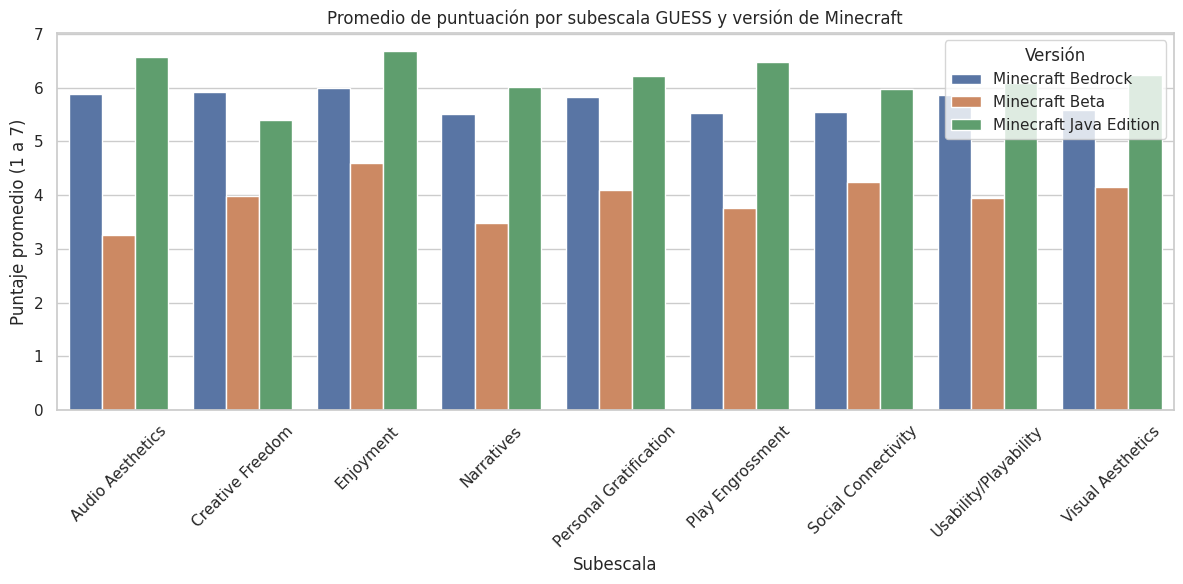

In [7]:
# Gráfico de barras agrupadas por subescala
mean_melted = mean_scores.melt(id_vars='version', var_name='subescala', value_name='puntaje')
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_melted, x='subescala', y='puntaje', hue='version')
plt.title('Promedio de puntuación por subescala GUESS y versión de Minecraft')
plt.xticks(rotation=45)
plt.ylabel('Puntaje promedio (1 a 7)')
plt.xlabel('Subescala')
plt.legend(title='Versión')
plt.tight_layout()
plt.show()

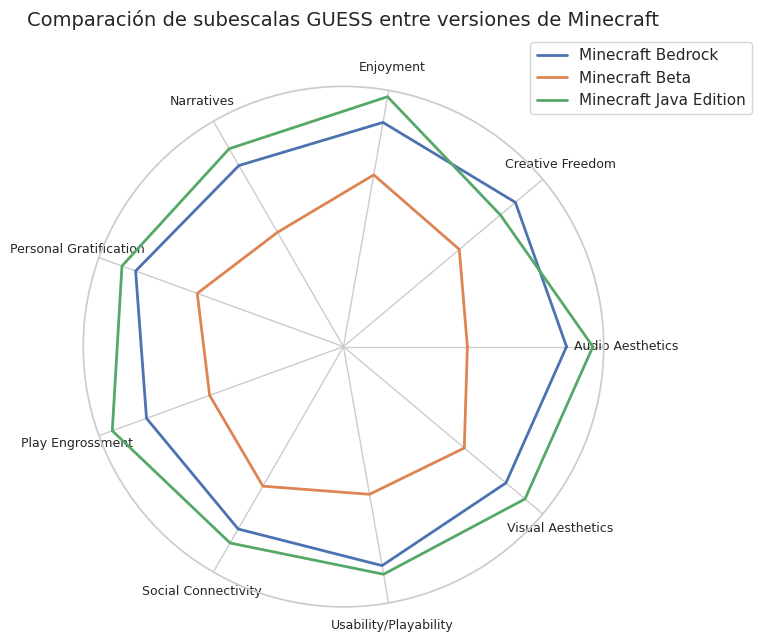

In [8]:
# Radar chart comparativo con todas las versiones
labels = mean_scores.columns[1:].tolist()
angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
angles += angles[:1]

plt.figure(figsize=(8, 8))
for i, row in mean_scores.iterrows():
    stats = row[1:].tolist()
    stats += stats[:1]
    plt.polar(angles, stats, label=row['version'], linewidth=2)

plt.xticks(angles[:-1], labels, fontsize=9)
plt.yticks([])
plt.title('Comparación de subescalas GUESS entre versiones de Minecraft', size=14, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

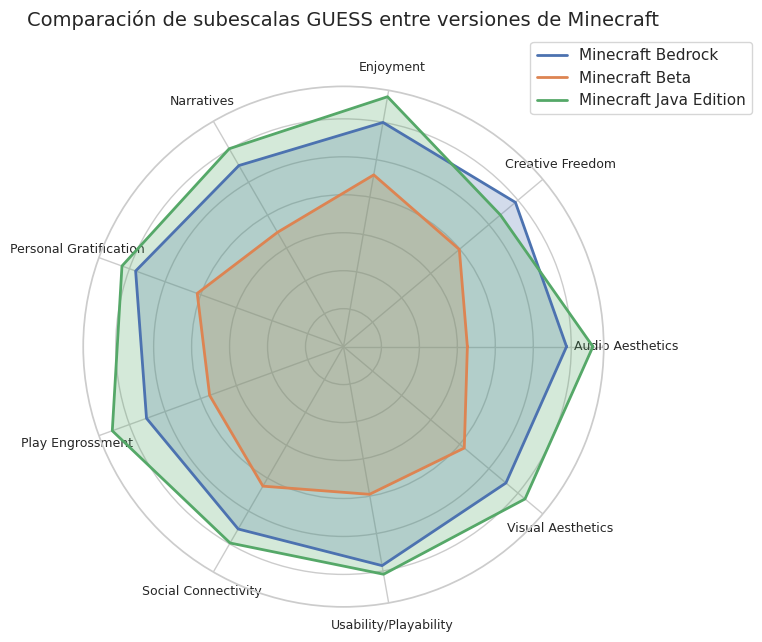

In [9]:
# Radar chart comparativo con todas las versiones (con área rellena)
labels = mean_scores.columns[1:].tolist()
angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Dibujar cada línea con su área rellena
for i, row in mean_scores.iterrows():
    stats = row[1:].tolist()
    stats += stats[:1]
    ax.plot(angles, stats, label=row['version'], linewidth=2)
    ax.fill(angles, stats, alpha=0.25)  # área bajo la curva

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=9)
ax.set_yticklabels([])
ax.set_title('Comparación de subescalas GUESS entre versiones de Minecraft', size=14, y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


## Otras visualizaciones posibles

Además de los gráficos de barras y el gráfico radial, existen otras formas útiles de visualizar la información recolectada con el cuestionario GUESS:

### 🔥 1. Heatmap (Mapa de calor)
Permite observar rápidamente qué versiones destacan o tienen debilidades en ciertas subescalas. Cada celda representa el puntaje promedio de una subescala para una versión específica, utilizando una escala de colores.

### 📦 2. Boxplot (Diagrama de caja)
Muestra la distribución completa de las puntuaciones por subescala y versión. Es útil para detectar asimetrías, valores extremos (outliers) y diferencias en la dispersión entre versiones.

### 🎻 3. Violin plot
Amplía la información del boxplot mostrando también la forma de la distribución (densidad). Ideal para comparar la variabilidad y concentración de respuestas en cada subescala.

Estas visualizaciones son complementarias y ayudan a identificar patrones que podrían no ser evidentes en promedios simples.


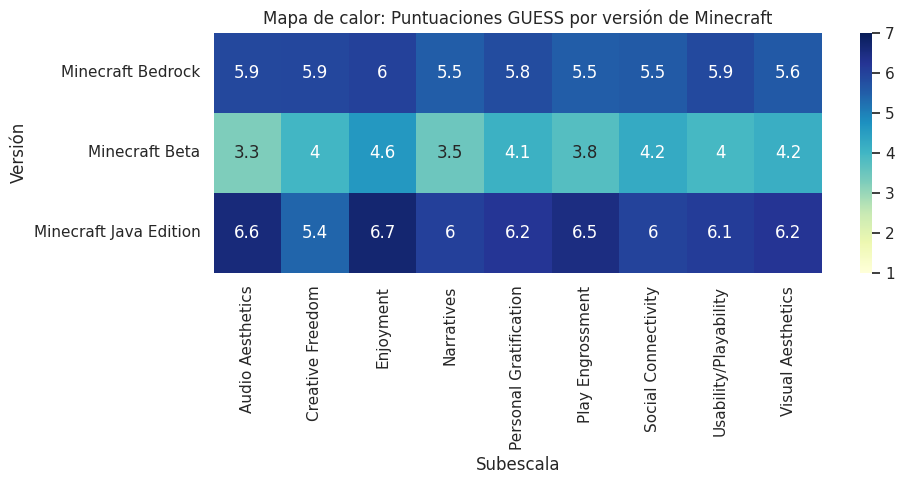

In [14]:
plt.figure(figsize=(10, 5))
sns.heatmap(mean_scores.set_index('version'), annot=True, cmap='YlGnBu', cbar=True, vmin=1, vmax=7)
plt.title('Mapa de calor: Puntuaciones GUESS por versión de Minecraft')
plt.xlabel('Subescala')
plt.ylabel('Versión')
plt.tight_layout()
plt.show()



### 🔥 Heatmap de correlación (versión Minecraft Java Edition)

Este gráfico muestra las **correlaciones entre las subescalas del cuestionario GUESS**, pero centrado únicamente en los datos de la **versión Minecraft Java Edition**, la más reciente y robusta del conjunto.

#### ¿Qué representa?
- Cada celda muestra el grado de relación entre dos dimensiones del cuestionario (por ejemplo, entre *Enjoyment* y *Play Engrossment*).
- Valores cercanos a **1** indican una **fuerte relación positiva** (ambas suben juntas).
- Valores cercanos a **-1** indicarían una **fuerte relación inversa** (una sube mientras la otra baja).
- Un valor cercano a **0** sugiere **independencia** entre dimensiones.

#### ¿Para qué sirve?
- Permite identificar **patrones de consistencia** entre factores del diseño de juegos.
- Es útil para detectar **agrupamientos naturales de subescalas**, como aquellas que miden inmersión, estética o usabilidad.
- Ayuda a decidir si algunas métricas podrían ser **reducidas o combinadas** en análisis más avanzados.

> Este enfoque focalizado evita mezclar estructuras de correlación entre versiones, y refleja de manera más fiel cómo los jugadores de *Minecraft Java Edition* perciben las distintas dimensiones del juego.

NOTA: Para facilitar la lectura, los nombres de las subescalas han sido abreviados y se utilizó una paleta de colores suave (`YlGnBu`) que permite identificar correlaciones sin saturación visual.


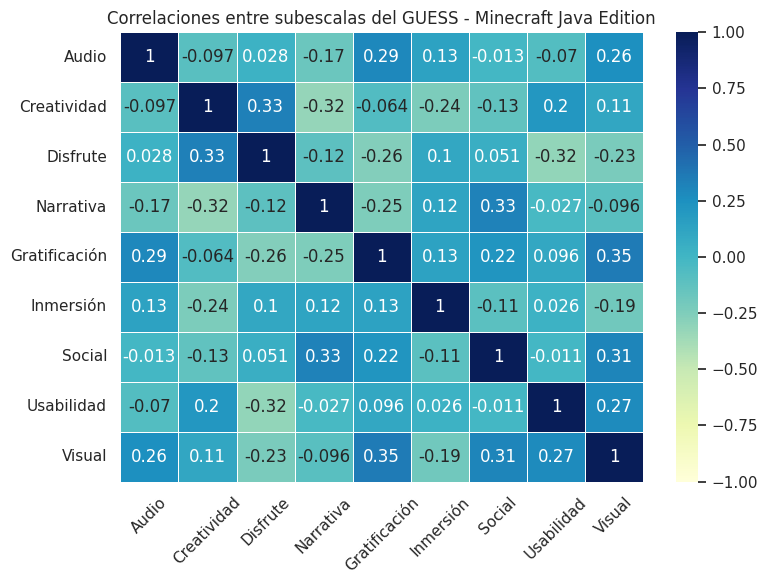

In [19]:
# Filtrar solo Minecraft Java Edition
df_java = df[df['version'] == 'Minecraft Java Edition'].copy()

# Renombrar columnas para abreviar
abreviaciones = {
    "Audio Aesthetics": "Audio",
    "Creative Freedom": "Creatividad",
    "Enjoyment": "Disfrute",
    "Narratives": "Narrativa",
    "Personal Gratification": "Gratificación",
    "Play Engrossment": "Inmersión",
    "Social Connectivity": "Social",
    "Usability/Playability": "Usabilidad",
    "Visual Aesthetics": "Visual"
}
df_java = df_java.rename(columns=abreviaciones)

# Calcular matriz de correlación
correlation_matrix = df_java.drop(columns=['version', 'usuario']).corr()

# Heatmap con paleta suave
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlaciones entre subescalas del GUESS - Minecraft Java Edition')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### 📋 Interpretación del heatmap de correlación

A partir de los datos de Minecraft Java Edition, se observan varios patrones interesantes entre las subescalas del cuestionario GUESS:

- **Gratificación y Visual** presentan una **correlación positiva moderada** (r = 0.35), lo que sugiere que los jugadores que se sintieron visualmente atraídos por el juego también reportaron mayores niveles de gratificación personal.
- **Narrativa y Social** tienen una correlación positiva (r = 0.33), indicando que una mayor conexión con la historia del juego podría estar relacionada con un mayor sentido de interacción social.
- **Disfrute y Creatividad** se correlacionan moderadamente (r = 0.33), lo que podría indicar que quienes disfrutaron más el juego también sintieron más libertad creativa.
- **Disfrute y Usabilidad** tienen una correlación negativa (r = -0.32), lo que podría ser una señal interesante: los jugadores que más disfrutaron del juego no necesariamente lo percibieron como el más usable.
- **Narrativa y Creatividad** se correlacionan negativamente (r = -0.32), lo cual podría indicar que una estructura narrativa más marcada podría reducir la sensación de libertad creativa para algunos jugadores.

En general, las correlaciones no son extremas, lo cual es típico en cuestionarios subjetivos como GUESS, pero sí se observan patrones que podrían ser relevantes para el diseño de experiencias más balanceadas y coherentes.


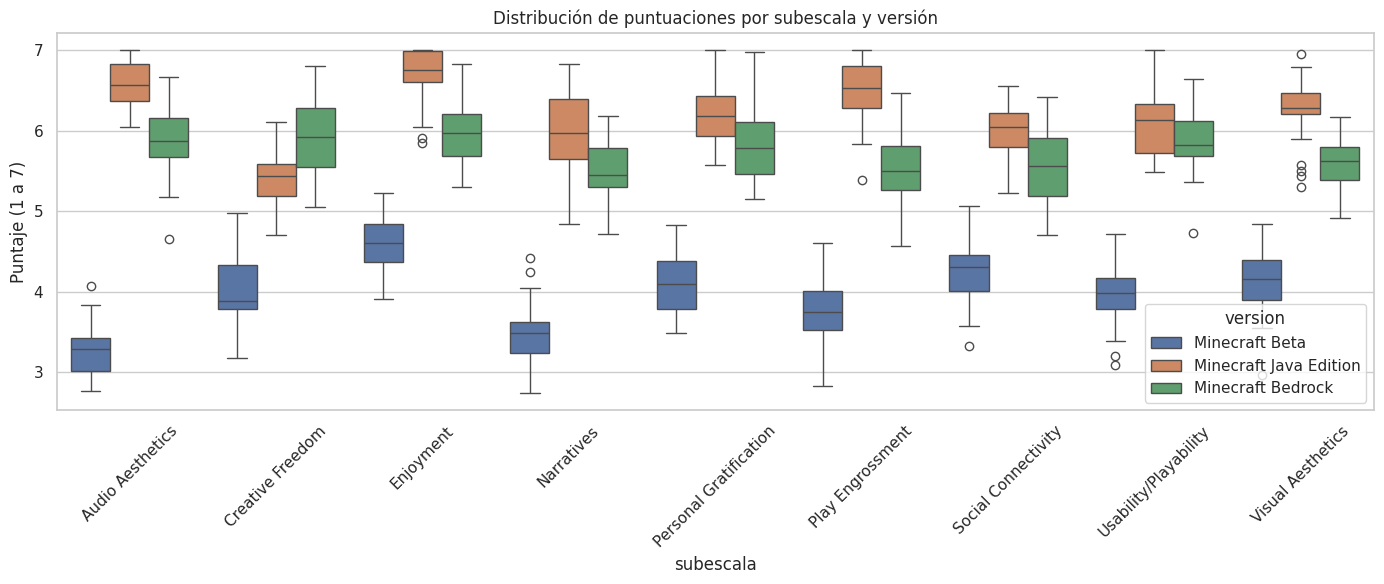

In [13]:
df_melted = df.melt(id_vars=['version', 'usuario'], var_name='subescala', value_name='puntaje')

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_melted, x='subescala', y='puntaje', hue='version')
plt.title('Distribución de puntuaciones por subescala y versión')
plt.xticks(rotation=45)
plt.ylabel('Puntaje (1 a 7)')
plt.tight_layout()
plt.show()



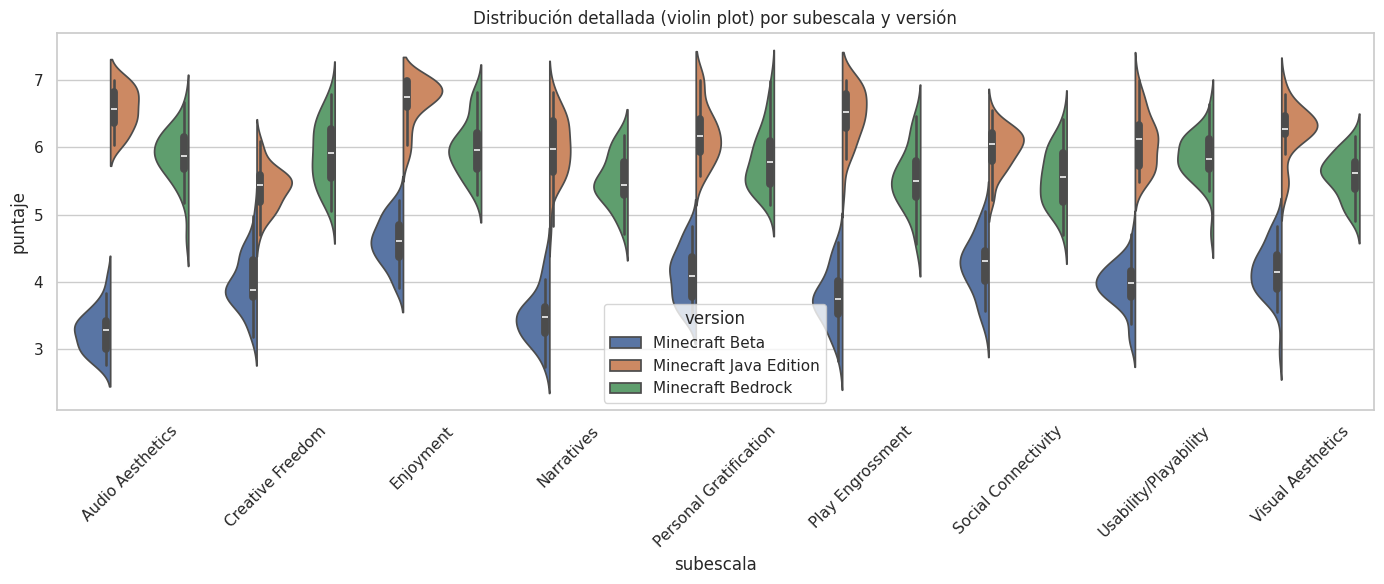

In [15]:
plt.figure(figsize=(14, 6))
sns.violinplot(data=df_melted, x='subescala', y='puntaje', hue='version', split=True)
plt.title('Distribución detallada (violin plot) por subescala y versión')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


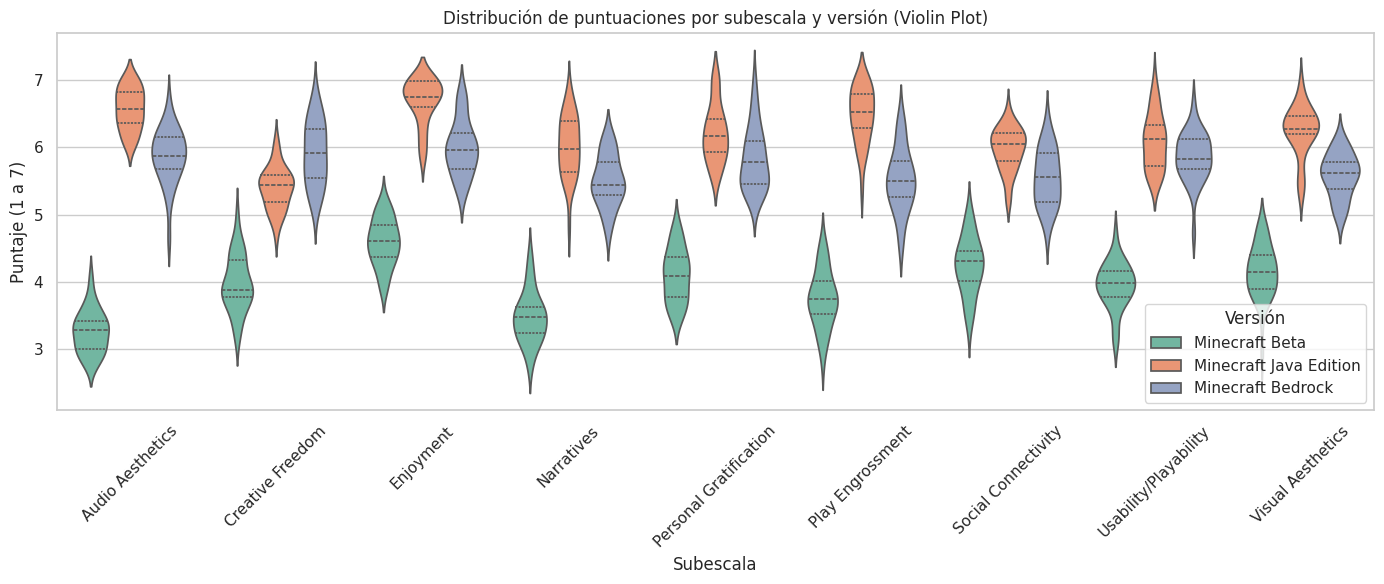

In [16]:
plt.figure(figsize=(14, 6))
sns.violinplot(
    data=df_melted,
    x='subescala',
    y='puntaje',
    hue='version',
    split=False,  # mejor separados
    inner='quartile',  # para mostrar medianas
    palette='Set2'  # colores más amigables
)
plt.title('Distribución de puntuaciones por subescala y versión (Violin Plot)')
plt.xticks(rotation=45)
plt.ylabel('Puntaje (1 a 7)')
plt.xlabel('Subescala')
plt.legend(title='Versión')
plt.tight_layout()
plt.show()


### 📈 Gráfico de líneas de perfil

Este gráfico permite visualizar cómo se comporta cada versión del software a lo largo de todas las subescalas del cuestionario GUESS. Cada línea representa una versión, y su recorrido muestra el puntaje promedio en cada subescala.

#### ¿Cuándo usarlo?
- Cuando se desea **comparar grupos** (versiones, condiciones, dispositivos) en múltiples dimensiones.
- Para detectar **patrones globales** (por ejemplo: una versión es mejor en usabilidad pero peor en narrativa).
- Cuando se busca una representación más clara que los gráficos de barras o violines para múltiples categorías.

Este tipo de visualización es especialmente útil en contextos de evaluación de experiencia de usuario (UX), ya que permite comparar perfiles de percepción de manera compacta y comprensible.


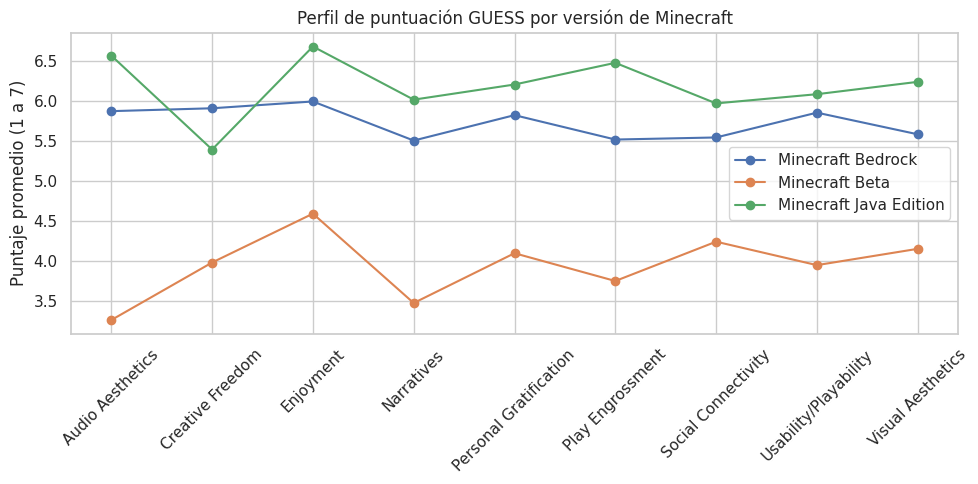

In [17]:
plt.figure(figsize=(10, 5))
for i, row in mean_scores.iterrows():
    plt.plot(mean_scores.columns[1:], row[1:], marker='o', label=row['version'])

plt.title('Perfil de puntuación GUESS por versión de Minecraft')
plt.ylabel('Puntaje promedio (1 a 7)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
